In [23]:
import numpy as np
import hmvec as hm
import matplotlib
import matplotlib.pyplot as plt

#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'xx-large'
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'

#Grid for Integration
Nz = 100                                 # num of redshifts
Nm = 100                                 # num of masses
Nk = 10001                                # num of wavenumbers
redshifts = np.linspace(0.01, 3, Nz)             # redshifts
masses = np.geomspace(1e11, 1e15, Nm)           # masses
ks = np.geomspace(1e-3, 100, Nk)               # wavenumbers
frequencies = 271.0

#Initialize Halo Model
hcos = hm.HaloModel(redshifts, ks, ms=masses, v_obs=frequencies)

#Get Power Spectra
Pjj_2h = hcos.get_power_2halo("cib", "cib")  # P(z,k)

First, let's look at our 3D power spectrum. We expect it to peak at around k = 0.02

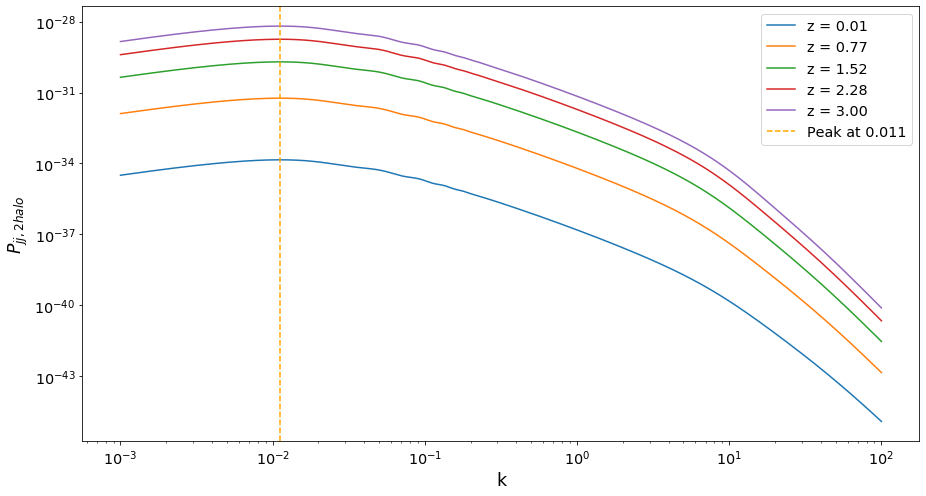

In [24]:
plt.figure(figsize=(15,8))

#Plot Power Spectra
zs = [0,25,50,75,99]                       # index of redshift you wish to plot Pjj_2h at
for zi in zs:
    plt.loglog(ks, Pjj_2h[zi,:], label=f"z = {redshifts[zi]:0.2f}")

#Plot Peak
kpeak = ks[np.argmax(Pjj_2h[0,:])]
plt.axvline(x = kpeak, ls='--', color='orange', label=f'Peak at {kpeak:0.3f}')

#Gravy
plt.legend()
plt.ylabel(r"$P_{jj, 2halo}$")
plt.xlabel('k');

In [ ]:
#Limber Integrals
eplotlls = np.linspace(100, 1000)
Ccc = hm.C_cc()

#Plot
plt.loglog(ells,Ccc)
plt.show()